# Implementing logistic regression with tensorflow
## Done for Hands On ML chapter 9 exercise 12

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

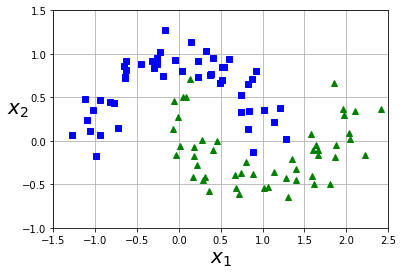

In [3]:
# Import data
from sklearn.datasets import make_moons
n_samples = 100
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.show()

In [4]:
# Information on batch sizes / percentages
n_train_iterations = 5000
batch_size = 25
learn_rate = 5e-3

def get_moons_batch():
    indices = np.random.randint(n_samples, size=batch_size)
    X_ = X_moons[indices, :]
    y_ = y_moons[indices].reshape(-1, 1).astype(np.float32)
    return X_, y_

# Set up variables
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, 2), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")


theta = tf.Variable(initial_value=np.random.random((2, 1))*2-1, 
                    dtype=tf.float32, name="weights")

# Loss function
epsilon = 1e-10
p = 1. / (1. + tf.exp(-1 * tf.matmul(X, theta)))
loss_func = - (tf.matmul(tf.transpose(y), tf.log(p + epsilon)) +
    tf.matmul(tf.transpose(1. - y), tf.log(1. - p + epsilon)))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learn_rate)
training_op = optimizer.minimize(loss_func)

init = tf.global_variables_initializer()

In [5]:
# Run the session
with tf.Session() as sess:
    sess.run(init)
    
    # Print start theta
    print("Start theta:\n{}\n".format(theta.eval()))
    for batch_num in range(n_train_iterations):
        X_batch, y_batch = get_moons_batch()
        _, p_val, loss = sess.run([training_op, p, loss_func], feed_dict={X: X_batch, y: y_batch})
        
        # Print loss function
        if batch_num % (n_train_iterations // 5) == 0:
            print("Batch #{}: loss = {}".format(batch_num, loss[0, 0]))
            
    best_theta = theta.eval()
    
    # Evaluate accuracy score
    p_final = sess.run(p, feed_dict={X: X_moons})
    best_score = accuracy_score(y_moons, np.round(p_final))

    
# Display the best theta
print("\n\nBest Score: {}".format(best_score))

print("Best theta:\n{}\n".format(best_theta))

Start theta:
[[-0.30145898]
 [ 0.55814683]]

Batch #0: loss = 22.089109420776367
Batch #1000: loss = 6.039754867553711
Batch #2000: loss = 8.226639747619629
Batch #3000: loss = 7.881573677062988
Batch #4000: loss = 2.2746455669403076


Best Score: 0.88
Best theta:
[[ 1.40956116]
 [-4.17738676]]



In [6]:
# Try again using better built-in functions

# Information on batch sizes / percentages
n_train_iterations = 10000
batch_size = 25
learn_rate = 5e-3

def get_moons_batch():
    indices = np.random.randint(n_samples, size=batch_size)
    X_ = X_moons[indices, :]
    y_ = y_moons[indices].reshape(-1, 1).astype(np.float32)
    return X_, y_

# Set up variables
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, 2), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")


theta = tf.Variable(initial_value=np.random.random((2, 1))*2-1, 
                    dtype=tf.float32, name="weights")

# Loss function
logits = tf.matmul(X, theta, name="logits")
p = tf.sigmoid(logits)
loss_func = tf.losses.log_loss(y, p)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learn_rate)
training_op = optimizer.minimize(loss_func)

init = tf.global_variables_initializer()

# Run the session
with tf.Session() as sess:
    sess.run(init)
    
    # Print start theta
    print("Start theta:\n{}\n".format(theta.eval()))
    for batch_num in range(n_train_iterations):
        X_batch, y_batch = get_moons_batch()
        _, p_val, loss = sess.run([training_op, p, loss_func], feed_dict={X: X_batch, y: y_batch})
        
        # Print loss function
        if batch_num % (n_train_iterations // 5) == 0:
            print("Batch #{}: loss = {}".format(batch_num, loss))
            
    best_theta = theta.eval()
    
    # Evaluate accuracy score
    p_final = sess.run(p, feed_dict={X: X_moons})
    best_score = accuracy_score(y_moons, np.round(p_final))

    
# Display the best theta
print("\n\nBest Score: {}".format(best_score))
print("Best theta:\n{}\n".format(best_theta))

Start theta:
[[-0.62637001]
 [ 0.97536504]]

Batch #0: loss = 1.093448281288147
Batch #2000: loss = 0.44453829526901245
Batch #4000: loss = 0.31966808438301086
Batch #6000: loss = 0.19728673994541168
Batch #8000: loss = 0.339651495218277


Best Score: 0.86
Best theta:
[[ 1.29450512]
 [-2.87061477]]



# Define a logistic regression function to set up graph

In [7]:
def log_reg_graph(X, y):
    theta = tf.Variable(initial_value=np.random.random((2, 1))*2-1, 
                        dtype=tf.float32, name="weights")

    # Loss function
    logits = tf.matmul(X, theta, name="logits")
    p = tf.sigmoid(logits)
    loss_func = tf.losses.log_loss(y, p)
    loss_summ = tf.summary.scalar('log_loss', loss_func)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learn_rate)
    training_op = optimizer.minimize(loss_func)
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
    return p, theta, loss_func, loss_summ, init, saver, training_op

In [8]:
from datetime import datetime
def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [9]:
tf.reset_default_graph()
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, 2), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

p, theta, loss_func, loss_summ, init, saver, training_op = log_reg_graph(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [10]:
checkpoint_path = "./tmp/logreg_checkpoint.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./models/my_logreg_model"

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(n_samples / batch_size))

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
        
    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = get_moons_batch()
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss_func, loss_summ],
                                         feed_dict={X: X_moons, y: y_moons.reshape(-1, 1)})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = p.eval(feed_dict={X: X_moons, y: y_moons.reshape(-1, 1)})
    theta_val = theta.eval()
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.794572
Epoch: 500 	Loss: 0.474075
Epoch: 1000 	Loss: 0.400489
Epoch: 1500 	Loss: 0.36673
Epoch: 2000 	Loss: 0.34708
Epoch: 2500 	Loss: 0.334316
Epoch: 3000 	Loss: 0.325553
Epoch: 3500 	Loss: 0.319131
Epoch: 4000 	Loss: 0.314524
Epoch: 4500 	Loss: 0.311064
Epoch: 5000 	Loss: 0.308395
Epoch: 5500 	Loss: 0.306363
Epoch: 6000 	Loss: 0.304623
Epoch: 6500 	Loss: 0.303336
Epoch: 7000 	Loss: 0.302274
Epoch: 7500 	Loss: 0.301429
Epoch: 8000 	Loss: 0.300714
Epoch: 8500 	Loss: 0.300119
Epoch: 9000 	Loss: 0.29961
Epoch: 9500 	Loss: 0.299224
Epoch: 10000 	Loss: 0.298844


In [11]:
theta_val

array([[ 1.37735367],
       [-3.63062119]], dtype=float32)

In [12]:
accuracy_score(y_moons.reshape(-1, 1), np.round(y_proba_val))

0.88

# Compare to sklearn logistic regression to see if it matches (it should)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_moons, y_moons)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
log_reg.coef_

array([[ 1.1391435 , -2.80044793]])

In [15]:
log_reg.predict([[0., 1.]])

array([0], dtype=int64)

In [16]:
log_reg.predict_proba([[-1, -1]])

array([[ 0.14551799,  0.85448201]])

In [17]:
log_reg.score(X_moons, y_moons)

0.85999999999999999